In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [12]:
df1=pd.read_excel('C:/Users/Sumit/Desktop/NIIT/Projects/project4/DS3_C6_S4_TimeSeries_Sales_Data_Project.xls',parse_dates=['Order Date'],index_col="Order Date")
df1

,Row ID,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Order Date,,,,,,,,,,,,,,,,,,,,
2016-11-08,1,CA-2016-152156,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
2016-11-08,2,CA-2016-152156,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2016-06-12,3,CA-2016-138688,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
2015-10-11,4,US-2015-108966,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
2015-10-11,5,US-2015-108966,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-01-21,9990,CA-2014-110422,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,Florida,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
2017-02-26,9991,CA-2017-121258,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
2017-02-26,9992,CA-2017-121258,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932


In [13]:
df=df1[df1['Category']=='Furniture']
df

,Row ID,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Order Date,,,,,,,,,,,,,,,,,,,,
2016-11-08,1,CA-2016-152156,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
2016-11-08,2,CA-2016-152156,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2015-10-11,4,US-2015-108966,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
2014-06-09,6,CA-2014-115812,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
2014-06-09,11,CA-2014-115812,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-03-19,9963,CA-2015-168088,2015-03-22,First Class,CM-12655,Corinna Mitchell,Home Office,United States,Houston,Texas,77041,Central,FUR-BO-10004218,Furniture,Bookcases,Bush Heritage Pine Collection 5-Shelf Bookcase...,383.4656,4,0.32,-67.6704
2016-12-05,9965,CA-2016-146374,2016-12-10,Second Class,HE-14800,Harold Engle,Corporate,United States,Newark,Delaware,19711,East,FUR-FU-10002671,Furniture,Furnishings,Electrix 20W Halogen Replacement Bulb for Zoom...,13.4000,1,0.00,6.4320
2015-09-06,9981,US-2015-151435,2015-09-09,Second Class,SW-20455,Shaun Weien,Consumer,United States,Lafayette,Louisiana,70506,South,FUR-TA-10001039,Furniture,Tables,KI Adjustable-Height Table,85.9800,1,0.00,22.3548


In [28]:
df.dtypes

Row ID                    int64
Order ID                 object
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object

### EDA

Text(0.5, 1.0, 'Profit')

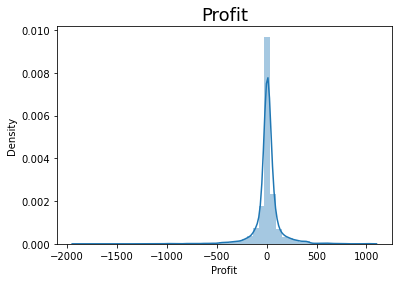

In [169]:
plt.figure(figsize=(6,4))
sns.distplot(df['Profit'])
plt.title('Profit',fontsize=18)

Text(0.5, 1.0, 'Sales')

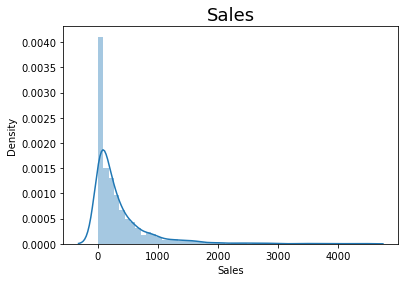

In [170]:
plt.figure(figsize=(6,4))
sns.distplot(df['Sales'])
plt.title('Sales',fontsize=18)

Text(0.5, 1.0, 'Discount')

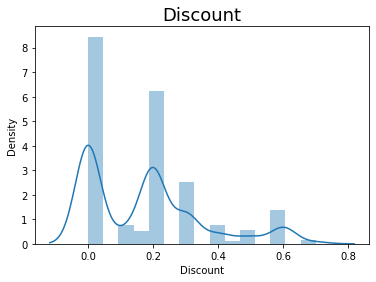

In [171]:
plt.figure(figsize=(6,4))
sns.distplot(df['Discount'])
plt.title('Discount',fontsize=18)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


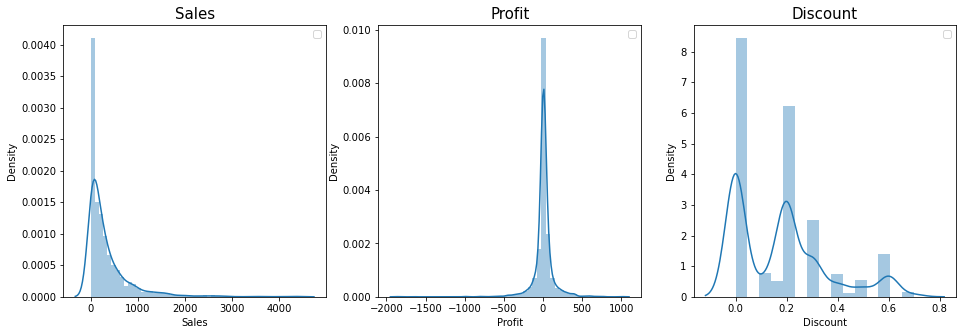

In [178]:
_,ax=plt.subplots(1,3,figsize=(16,5))

plt.subplot(131)
plt.title('Sales',fontsize=15)
sns.distplot(df['Sales'])
plt.legend()

plt.subplot(132)
plt.title('Profit',fontsize=15)
sns.distplot(df['Profit'])
plt.legend()

plt.subplot(133)
plt.title('Discount',fontsize=15)
sns.distplot(df['Discount'])
plt.legend()

Text(0.5, 1.0, 'Segments')

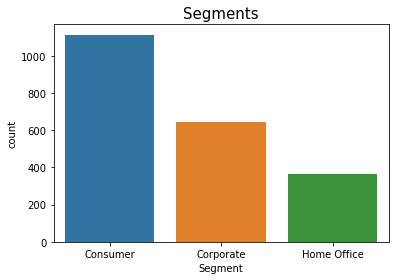

In [180]:
sns.countplot(df['Segment'])
plt.title('Segments',fontsize=15)

Text(0.5, 1.0, 'Ship Mode')

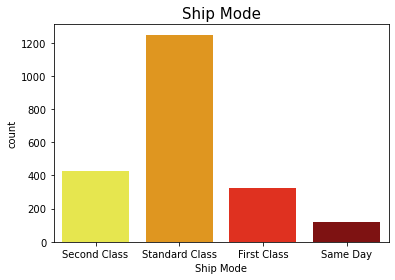

In [181]:
sns.countplot(df['Ship Mode'],palette='hot_r')
plt.title('Ship Mode',fontsize=15)

In [17]:
df.head()

,Row ID,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Order Date,,,,,,,,,,,,,,,,,,,,
2016-11-08,1,CA-2016-152156,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
2016-11-08,2,CA-2016-152156,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2015-10-11,4,US-2015-108966,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
2014-06-09,6,CA-2014-115812,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
2014-06-09,11,CA-2014-115812,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


In [26]:
profit=df.groupby('Sub-Category')['Discount'].sum()
#plt.plot(kind='bar',x=profit,y=df['Sales'])
profit

Sub-Category
Bookcases       48.14
Chairs         105.00
Furnishings    132.40
Tables          83.35
Name: Discount, dtype: float64

Text(0.5, 1.0, 'Sub-Category wise Profit')

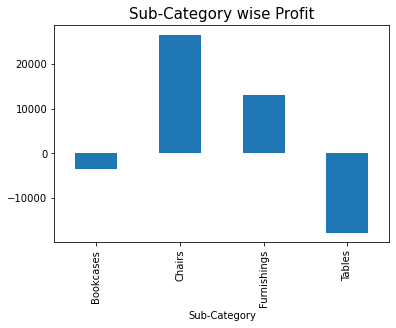

In [20]:
df.groupby('Sub-Category')['Profit'].sum().plot(kind='bar')

plt.title('Sub-Category wise Profit',fontsize=15)


In [19]:
profit

Sub-Category
Bookcases      -3472.5560
Chairs         26590.1663
Furnishings    13059.1436
Tables        -17725.4811
Name: Profit, dtype: float64

Text(0.5, 1.0, 'Sub-Category wise Discount')

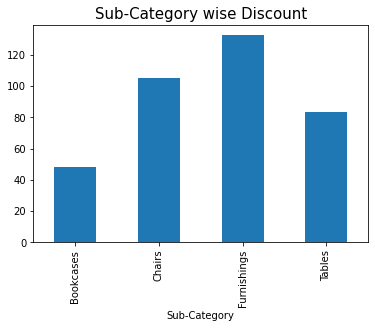

In [15]:
df.groupby('Sub-Category')['Discount'].sum().plot(kind='bar')
plt.title('Sub-Category wise Discount',fontsize=15)

Text(0.5, 1.0, 'Sub-Category wise Sales')

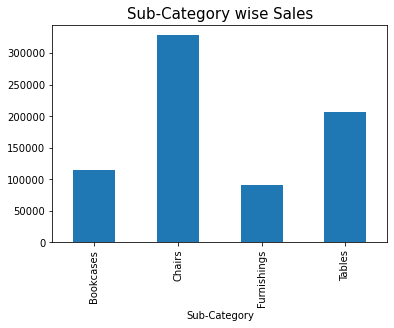

In [186]:
df.groupby('Sub-Category')['Sales'].sum().plot(kind='bar')
plt.title('Sub-Category wise Sales',fontsize=15)

Text(0.5, 1.0, 'Region wise Ship Mode')

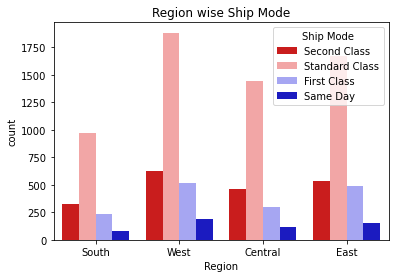

In [132]:
sns.countplot(df1['Region'],hue=df1['Ship Mode'],palette='seismic_r')
plt.title('Region wise Ship Mode')


Text(0.5, 1.0, 'Category wise Region')

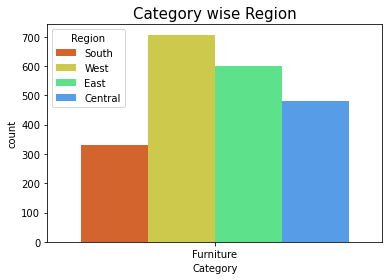

In [182]:
sns.countplot(df['Category'],hue=df['Region'],palette='turbo_r')
plt.title('Category wise Region',fontsize=15)


Text(0.5, 1.0, 'Region wise sales')

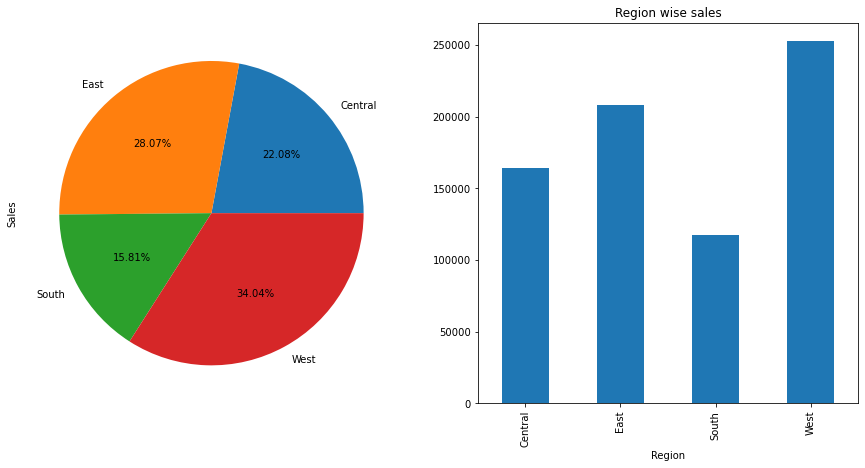

In [193]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
plt.title('Region wise sales')
df.groupby('Region')['Sales'].sum().plot(kind='pie',autopct='%.2f%%',ax=ax[0])
c=['red','lime','yellow','orange']
df.groupby('Region')['Sales'].sum().plot(kind='bar')
plt.title('Region wise sales')
#region wise sales

<AxesSubplot:xlabel='Region'>

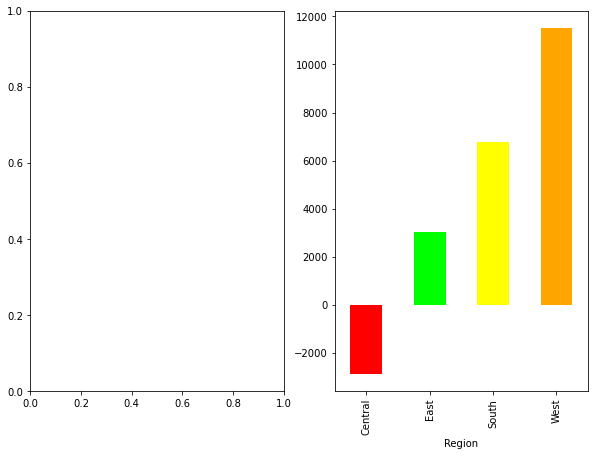

In [116]:
fig, ax = plt.subplots(1, 2, figsize = (10, 7))
#df.groupby('Region')['Profit'].sum().plot(kind='pie',autopct='%.2f%%',ax=ax[0])
c=['red','lime','yellow','orange']
df.groupby('Region')['Profit'].sum().plot(kind='bar',color=c)
#region wise profit

Text(0.5, 1.0, 'Region wise profit')

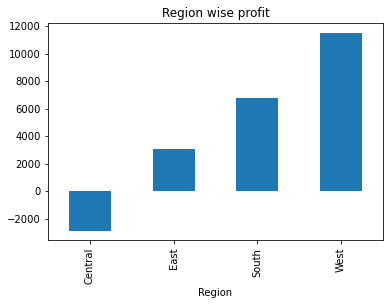

In [192]:
c=['red','lime','yellow','orange']
df.groupby('Region')['Profit'].sum().plot(kind='bar')
plt.title('Region wise profit')

Text(0.5, 1.0, 'Sub-Category wise sales')

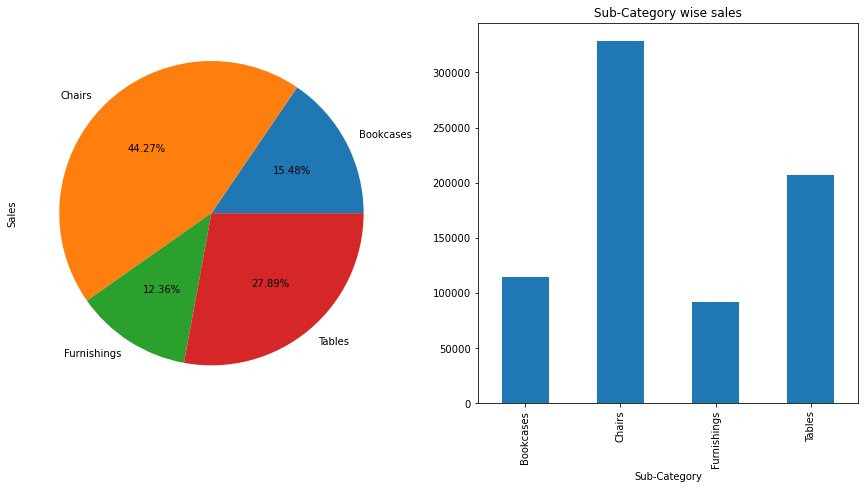

In [197]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
#plt.title('Sub-Category wise sales')
df.groupby('Sub-Category')['Sales'].sum().plot(kind='pie',autopct='%.2f%%',ax=ax[0])
df.groupby('Sub-Category')['Sales'].sum().plot(kind='bar')
plt.title('Sub-Category wise sales')

#sub-category wise sales

<AxesSubplot:xlabel='Category'>

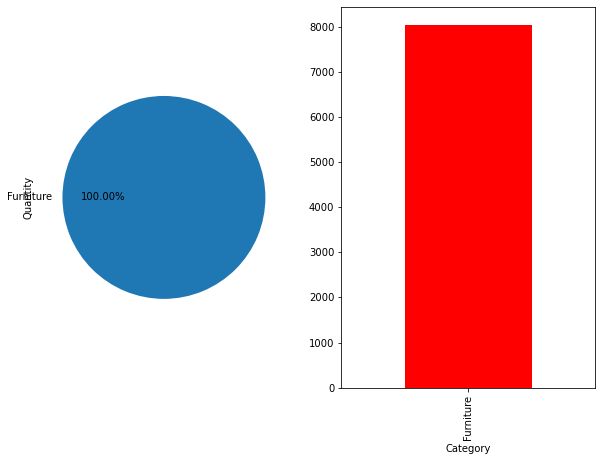

In [142]:
fig, ax = plt.subplots(1, 2, figsize = (10, 7))
df.groupby('Category')['Quantity'].sum().plot(kind='pie',autopct='%.2f%%',ax=ax[0])
c=['red','lime','orange']
df.groupby('Category')['Quantity'].sum().plot(kind='bar',color=c)
#category wise sales

Text(0.5, 1.0, 'Furniture profit sagment wise in each region')

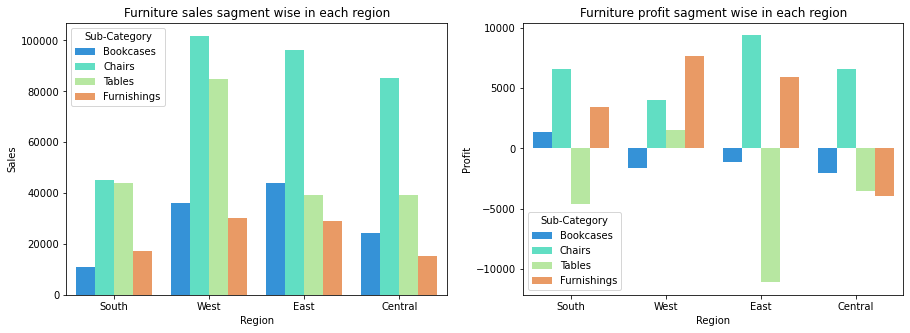

In [27]:
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.barplot(data=df,x='Region',hue='Sub-Category',y='Sales',estimator=np.sum,palette='rainbow',ci=0)
plt.title('Furniture sales sagment wise in each region')
plt.subplot(122)
sns.barplot(data=df,x='Region',hue='Sub-Category',y='Profit',estimator=np.sum,palette='rainbow',ci=0)
plt.title('Furniture profit sagment wise in each region')

In [139]:
df.head()

,Row ID,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Order Date,,,,,,,,,,,,,,,,,,,,
2016-11-08,1,CA-2016-152156,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
2016-11-08,2,CA-2016-152156,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2015-10-11,4,US-2015-108966,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
2014-06-09,6,CA-2014-115812,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
2014-06-09,11,CA-2014-115812,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


In [5]:
data_s=df.resample('w').mean()
data_w=data_s.Sales

In [6]:
data_w

Order Date
2014-01-12    678.107000
2014-01-19    250.094600
2014-01-26    183.995333
2014-02-02    311.833000
2014-02-09     14.560000
                 ...    
2017-12-03    500.255375
2017-12-10    314.085857
2017-12-17    244.201000
2017-12-24    330.638318
2017-12-31    224.309156
Freq: W-SUN, Name: Sales, Length: 208, dtype: float64

<AxesSubplot:xlabel='Order Date'>

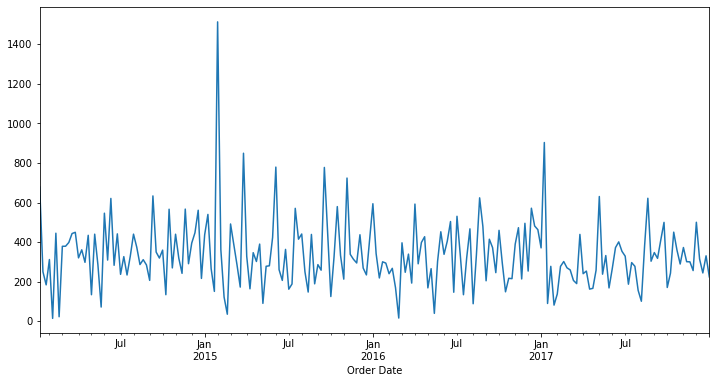

In [7]:
data_w.plot(figsize=(12,6))

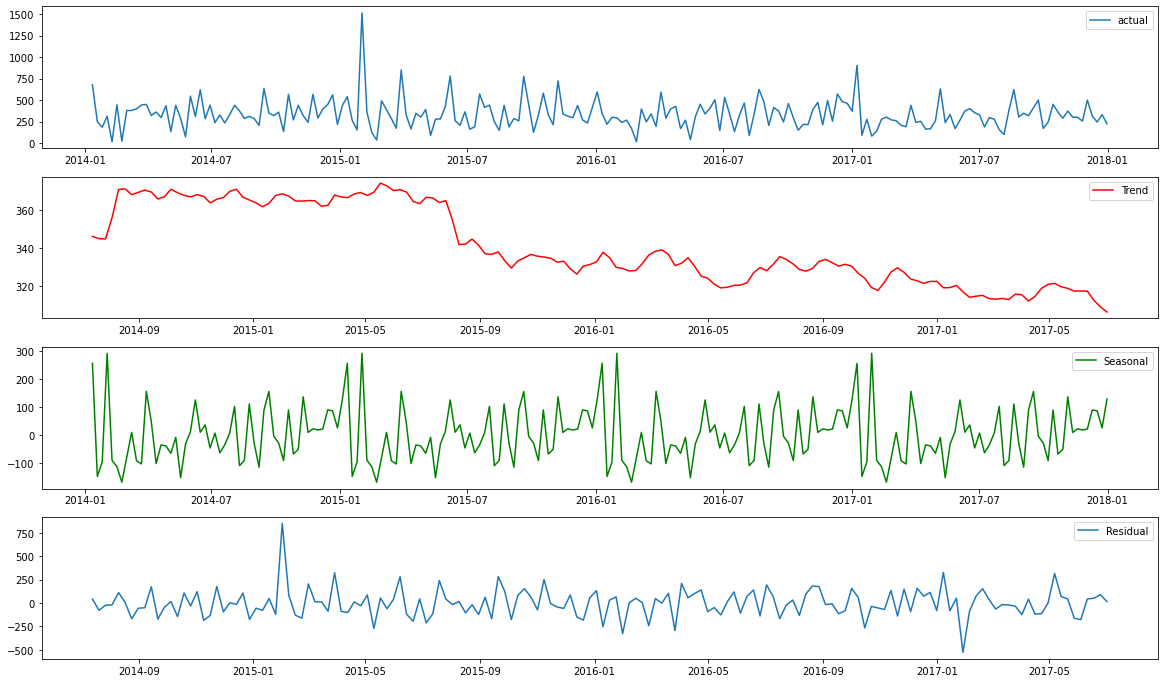

In [22]:
from statsmodels.tsa.seasonal import seasonal_decompose
#temp=data_w.values

ts_comp=seasonal_decompose(data_w,period=52)

d_trend=ts_comp.trend
d_seasonal=ts_comp.seasonal
d_residual=ts_comp.resid


#plot the components


fig,ax = plt.subplots(4,1,figsize=(20,12))
plt.subplot(411)
plt.plot(data_w,label='actual')
plt.legend()
plt.subplot(412)
plt.plot(d_trend,label='Trend',c='red')
plt.legend()
plt.subplot(413)
plt.plot(d_seasonal,label='Seasonal',c='g')
plt.legend()
plt.subplot(414)
plt.plot(d_residual,label='Residual')
plt.legend()
#plt.tight_layout()
#plt.savefig('trend.png',format='png')

## Checkstationarity

In [47]:
from statsmodels.tsa.stattools import adfuller,acf,pacf
def checkstationarity(data):
    pvalue=adfuller(data)[1]
    print(pvalue)
    if pvalue < 0.05:
        msg='Data is stationary. Proceed to model building'
    else:
        msg='Data is not stationary. Diff. the data before model building'
    
    return msg

In [48]:
checkstationarity(data_w)

8.124101346205066e-22


'Data is stationary. Proceed to model building'

## split data

In [8]:
ss=int(len(data_w)*0.7)
traint=data_s[:ss]
testt=data_s[ss:]
print('train={},test={}'.format(len(traint),len(testt)))

train=145,test=63


In [9]:
train=traint.Sales
test=testt.Sales
print('train={},test={}'.format(len(train),len(test)))

train=145,test=63


## ACF/PACF

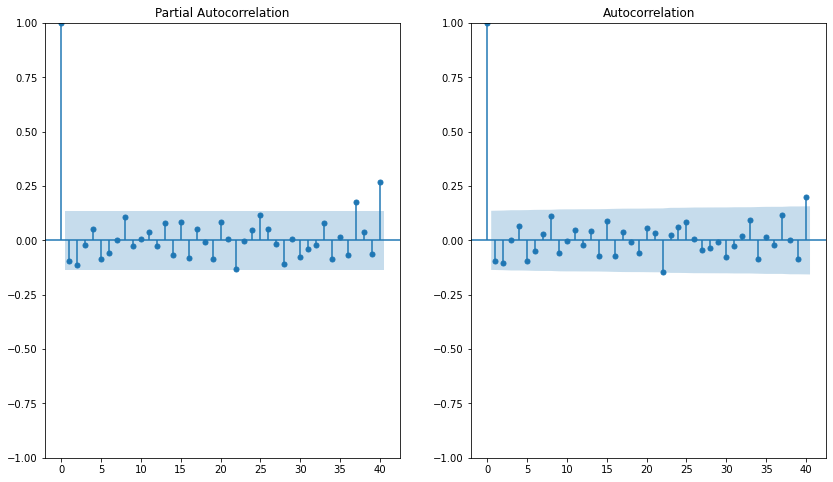

In [51]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
_,ax=plt.subplots(1,2,figsize=(14,8))

plot_pacf(data_w,lags=40,ax=ax[0]);
plot_acf(data_w,lags=40,ax=ax[1]);

## ARMA model

In [83]:
from statsmodels.tsa.arima.model import ARIMA

def arma(data,data1,p,d,q):
    train=pd.DataFrame(data)
    test=pd.DataFrame(data1)
    global mse
    m_a=ARIMA(train,order=(p,0,q)).fit()
    f1=m_a.predict(0,len(test)-1)
    
    
    actual=[]
    pred=[]
    for i in range(len(f1)):
        actual.append(test.Sales[i])
        pred.append(f1[i])
        
    df1=pd.DataFrame({'Actual':actual,'Predicted':pred})
    mse=mean_squared_error(df1.Actual,df1.Predicted)
    return mse

In [84]:
p=[0,1,2,3]
q=[0,1,2]
#print(len(p),len(q))
d=[0]
P=[];Q=[];RMSE=[];D=[]
for i in range(len(p)):
    for k in range(len(d)):
        for j in range(len(q)):
            arma(train,test,p=p[i],d=d[k],q=q[j])
            P.append(p[i]);D.append(d[k]);Q.append(q[j]);RMSE.append(round(np.sqrt(mse),3))
            print('p='+str(p[i])+'  d='+str(0)+'  q='+str(q[j])+' Rmse={}'.format(round(np.sqrt(mse),3)))


p=0  d=0  q=0 Rmse=145.265
p=0  d=0  q=1 Rmse=143.753
p=0  d=0  q=2 Rmse=145.532
p=1  d=0  q=0 Rmse=142.874
p=1  d=0  q=1 Rmse=143.134
p=1  d=0  q=2 Rmse=145.517
p=2  d=0  q=0 Rmse=146.908
p=2  d=0  q=1 Rmse=147.05
p=2  d=0  q=2 Rmse=147.867
p=3  d=0  q=0 Rmse=147.241
p=3  d=0  q=1 Rmse=147.255
p=3  d=0  q=2 Rmse=146.847


In [85]:
ARMA=pd.DataFrame(list(zip(P,D,Q,RMSE)),columns=['P','D','Q','RMSE'])
ARMA.sort_values(by=['RMSE'])

,P,D,Q,RMSE
3,1,0,0,142.874
4,1,0,1,143.134
1,0,0,1,143.753
0,0,0,0,145.265
5,1,0,2,145.517
2,0,0,2,145.532
11,3,0,2,146.847
6,2,0,0,146.908
7,2,0,1,147.050
9,3,0,0,147.241


In [55]:
print('Min rmse value:',min(RMSE))
print('Index of min RMSE value',RMSE.index(min(RMSE)))
#print('P and Q values at min rmse value ',(ARMA.loc[[3:,:]])


Min rmse value: 142.874
Index of min RMSE value 3


In [56]:
#ARMA.loc[3,:].to_frame().T

In [107]:
import statsmodels.api as sm

def arma1(data,data1,p,d,q):
   
  
    train = pd.DataFrame(data)
    test = pd.DataFrame(data1)
    #print(test)
    #print(train.meantemp)
    global aic1,bic1,mse1,m1

    m1=ARIMA(train,order=(p,d,q)).fit()
    summ=m1.summary()
    
    pvalue=sm.stats.acorr_ljungbox(m1.resid,lags=[1],return_df=True).lb_pvalue.values
    if pvalue < 0.05:
        print('not a good model')
    else:
        print('good model')
    aic1,bic1=m1.aic,m1.bic
    
    f1=m1.predict(0,len(test)-1)
    actual=[]
    pred=[]
    for i in range(len(f1)):
        actual.append(test.Sales[i])
        pred.append(f1[i])
    df1=pd.DataFrame({'actual':actual,'predicted':pred})
    #print(df1)
    mse1=mean_squared_error(df1.actual,df1.predicted)
     
    df1.actual.plot(figsize=(10,8),legend=True)
    df1.predicted.plot(legend=True)
    plt.title('Actual and Forecasted ')
    return summ,df1,pvalue

good model


(<class 'statsmodels.iolib.summary.Summary'>
 """
                                SARIMAX Results                                
 Dep. Variable:                  Sales   No. Observations:                  145
 Model:                 ARIMA(1, 0, 0)   Log Likelihood                -960.718
 Date:                Wed, 09 Nov 2022   AIC                           1927.436
 Time:                        20:29:18   BIC                           1936.367
 Sample:                    01-12-2014   HQIC                          1931.065
                          - 10-16-2016                                         
 Covariance Type:                  opg                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
 ------------------------------------------------------------------------------
 const        345.0579     16.196     21.305      0.000     313.315     376.801
 ar.L1         -0.1400      0.106     -1.327      0.184      -0.347   

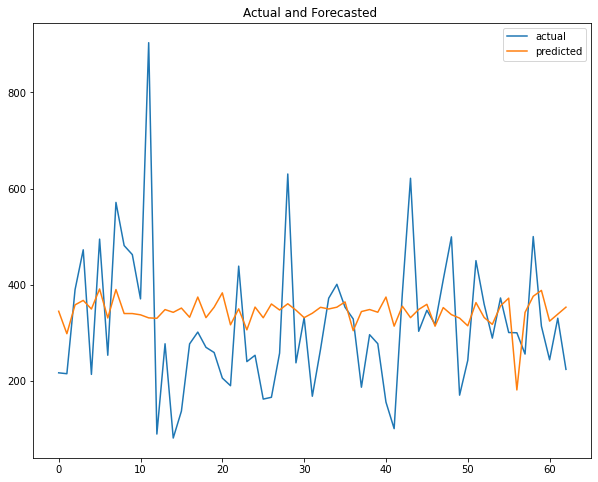

In [108]:
arma1(train,test,1,0,0)

In [20]:
#Our data is stationary so our ARIMA model will bhe treated as ARMA.

## SARIMA model

In [59]:
checkstationarity(d_seasonal)

0.0004016812325604948


'Data is stationary. Proceed to model building'

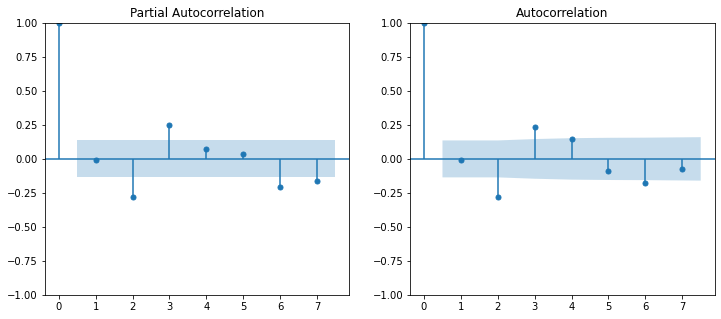

In [60]:
#for seasonal data
_,ax=plt.subplots(1,2,figsize=(12,5))
plot_pacf(d_seasonal,lags=7,ax=ax[0]);
plot_acf(d_seasonal,lags=7,ax=ax[1]);

In [86]:
#build sarima model
from statsmodels.tsa.statespace.sarimax import SARIMAX

def sarima(data,data1,p,d,q,P,D,Q):
  
    
    #print(test)
    m1=SARIMAX(data,order=(p,d,q),seasonal_order=(P,D,Q,52)).fit()

    global mse1

    f1=m1.forecast(len(data1))
    mse1=mean_squared_error(data1,f1)
    
    
    return 

In [87]:
p=[1,2]
d=[0]
q=[1,2]
P=[1,2]
D=[0]
Q=[1,2]
ps=[];ds=[];qs=[];
RMSE=[];Ps=[];Ds=[];Qs=[];

for i in range(len(p)):
    for j in range(len(d)):
        for k in range(len(q)):
            for l in range(len(P)):
                for m in range(len(D)):
                    for n in range(len(Q)):
                        ps.append(p[i]);ds.append(d[j]);qs.append(q[k]);Ps.append(P[l]);Ds.append(D[m]);Qs.append(Q[n]);RMSE.append(round(np.sqrt(mse1),3))
                        sarima(train,test,p=p[i],d=d[j],q=q[k],P=P[l],D=D[m],Q=Q[n])
                        #print('p='+str(p[i])+'  d='+str(d[j])+'  q='+str(q[k])+' P='+str(P[l])+'  D='+str(D[m])+'  Q='+str(Q[n])+'  Rmse={}'.format(round(np.sqrt(mse1),3)))
           

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

In [88]:
SARIMA=pd.DataFrame(list(zip(ps,ds,qs,Ps,Ds,Qs,RMSE)),columns=['p','d','q','P','D','Q','RMSE'])
SARIMA.sort_values(by=['RMSE'])[:1]

,p,d,q,P,D,Q,RMSE
5,1,0,2,1,0,2,142.757


##### best values for sarima model which contain least rmse value is on index 30.

In [89]:

#Building sarima model for best p,d,q values
#predicting model values
#forcasting model values

sm1=SARIMAX(train,order=(1,0,2),seasonal_order=(1,0,2,52)).fit()
pred=sm1.predict(len(test))
f1=sm1.forecast(len(test))
f1

2016-10-23    368.219744
2016-10-30    348.678222
2016-11-06    329.112577
2016-11-13    332.832323
2016-11-20    354.725826
                 ...    
2017-12-03    348.869273
2017-12-10    340.977345
2017-12-17    346.306649
2017-12-24    335.304514
2017-12-31    359.028286
Freq: W-SUN, Name: predicted_mean, Length: 63, dtype: float64

In [149]:
summ2=sm1.summary()
summ2

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Sales   No. Observations:                  145
Model:             SARIMAX(1, 0, 2)x(1, 0, 2, 52)   Log Likelihood                -963.873
Date:                            Thu, 10 Nov 2022   AIC                           1941.745
Time:                                    10:50:45   BIC                           1962.582
Sample:                                01-12-2014   HQIC                          1950.212
                                     - 10-16-2016                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9997      0.001    716.870      0.000       0.997       1.002
ma.L1         -1.1494      0.116     -9.948      0.000      -1.376      -0.923
ma.L2          0.1627      0.107      1.520      0.129      -0.047       0.373
ar.S.L52       0.9963      0.137      7.267      0.000       0.728       1.265
ma.S.L52      -1.0727      0.200     -5.351      0.000      -1.466      -0.680
ma.S.L104      0.0957      0.363      0.264      0.792      -0.616       0.807
sigma2       3.28e+04    9.5e-06   3.45e+09      0.000    3.28e+04    3.28e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):               500.97
Prob(Q):                              0.87   Prob(JB):                         0.00
Heteroskedasticity (H):               0.97   Skew:                             1.74
Prob(H) (two-sided):                  0.91   Kurtosis:                        11.41
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.8e+26. Standard errors may be unstable.
"""

In [155]:
bic2=sm1.aic.round(3)
aic2=sm1.aic.round(3)
aic2
bic2

1941.745

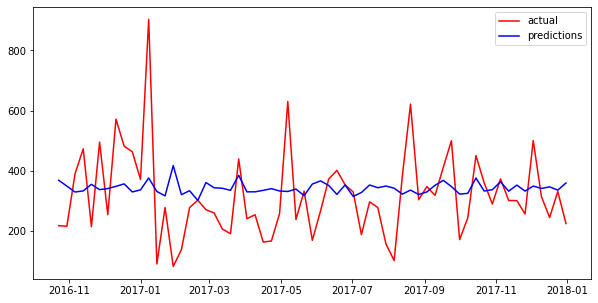

In [90]:
plt.figure(figsize=(10,5))
plt.plot(test, 'r', label = 'actual')
plt.plot(f1, 'b', label='predictions')

plt.legend()



In [80]:
mse2 = mean_squared_error(test,f1)
print('RMSE: ' + str(np.sqrt(mse2) ))

RMSE: 142.8840050380893


In [91]:
import statsmodels.api as sm
pvalue = sm.stats.acorr_ljungbox(sm1.resid,lags=[12],return_df=True)['lb_pvalue'].values
if pvalue<0.05:
    print('Not a good model')
else:
    print('Good model')

Good model


In [67]:
print('ARMA model RMSE value: ' + str(np.sqrt(mse1) ))
print('SARIMA model RMSE value: ' + str(np.sqrt(mse2) ))

ARMA model RMSE value: 146.27243473060327
SARIMA model RMSE value: 142.8840050380893


## Conclusion:SARIMA model perform well coz it contain min error values then ARIMA model.So we choose SARIMA model.

# Sarimax model

In [10]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
exog_train=traint[['Discount','Profit','Quantity']]
exog_test=testt[['Discount','Profit','Quantity']]

sm2=SARIMAX(train,order=(1,0,2),seasonal_order=(1,0,2,52),exog=exog_train.values).fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [102]:
sar_train=sm2.fittedvalues

In [233]:
test4=sm2.forecast(len(testt.Sales),exog=exog_test.values)
test4

2016-10-23    263.363399
2016-10-30    475.815474
2016-11-06    332.070193
2016-11-13    381.373306
2016-11-20    291.919589
                 ...    
2017-12-03    437.626467
2017-12-10    336.636334
2017-12-17    226.010641
2017-12-24    331.030975
2017-12-31    353.427184
Freq: W-SUN, Name: predicted_mean, Length: 63, dtype: float64

In [154]:
bic3=sm2.aic.round(3)
aic3=sm2.aic.round(3)
aic3
bic3

1902.079

In [148]:
summ3=sm2.summary()
summ3

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Sales   No. Observations:                  145
Model:             SARIMAX(1, 0, 2)x(1, 0, 2, 52)   Log Likelihood                -941.040
Date:                            Thu, 10 Nov 2022   AIC                           1902.079
Time:                                    10:50:13   BIC                           1931.847
Sample:                                01-12-2014   HQIC                          1914.175
                                     - 10-16-2016                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1          -116.5843    172.914     -0.674      0.500    -455.489     222.321
x2            -0.3267      0.126     -2.585      0.010      -0.574      -0.079
x3            94.6885      7.484     12.651      0.000      80.019     109.358
ar.L1         -0.8088      0.083     -9.698      0.000      -0.972      -0.645
ma.L1          0.7667      8.263      0.093      0.926     -15.429      16.962
ma.L2         -0.2333      1.929     -0.121      0.904      -4.014       3.547
ar.S.L52      -0.3083     77.263     -0.004      0.997    -151.742     151.125
ma.S.L52       0.4119     84.288      0.005      0.996    -164.789     165.613
ma.S.L104      0.3175      9.992      0.032      0.975     -19.266      19.901
sigma2      2.325e+04    1.7e+05      0.137      0.891   -3.09e+05    3.56e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                72.81
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):               0.98   Skew:                             0.89
Prob(H) (two-sided):                  0.94   Kurtosis:                         5.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [146]:
mse3 = mean_squared_error(test,test4)
print('RMSE: ' + str(np.sqrt(mse3) ))

RMSE: 146.89853813478288


In [240]:
forecast = pd.DataFrame()
forecast['ACTUAL']=test
ARIMA=m1.fittedvalues
SARIMA=sm1.fittedvalues
forecast['SARIMAx']=test4
forecast.tail(53)

,ACTUAL,SARIMA
Order Date,,
2017-01-01,370.798000,425.685970
2017-01-08,903.205000,357.989851
2017-01-15,89.860000,96.374595
2017-01-22,277.475286,276.658661
2017-01-29,81.587500,488.377759
2017-02-05,137.559286,246.184082
2017-02-12,277.220714,127.869800
2017-02-19,301.780044,256.617453
2017-02-26,270.104571,303.374789


In [232]:
forecast.iloc[:,[0,3]].tail(42)

,ACTUAL,SARIMAX
Order Date,,
2016-01-03,593.850000,376.317076
2016-01-10,341.778800,439.274402
2016-01-17,218.788750,481.515572
2016-01-24,300.392333,541.277849
2016-01-31,293.910000,352.312263
2016-02-07,240.251750,303.597170
2016-02-14,267.497000,407.869950
2016-02-21,169.264857,273.845166
2016-02-28,16.192000,125.208579


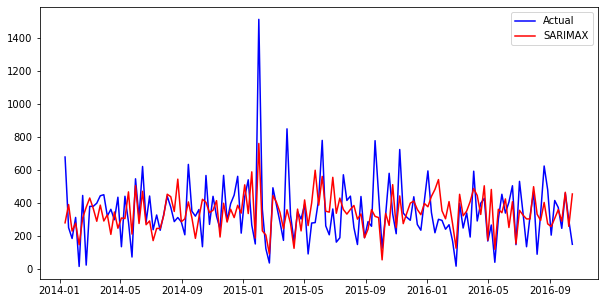

In [110]:
forecast['SARIMAX']=sar_train
forecast
plt.figure(figsize=(10,5))
plt.plot(forecast['ACTUAL'],label='Actual',c='b')
plt.plot(forecast['SARIMAX'],label='SARIMAX',c='r')
plt.legend();

In [206]:
fcast3 = sm2.predict(start=len(data_w), end=len(data_w)+30,exog=exog_train[:94])
fcast3

2018-01-07    317.102472
2018-01-14    218.207989
2018-01-21    180.960927
2018-01-28    208.844961
2018-02-04    275.456348
2018-02-11    349.184521
2018-02-18    288.240655
2018-02-25    313.396187
2018-03-04    617.070220
2018-03-11    312.403522
2018-03-18    537.078357
2018-03-25    282.357200
2018-04-01    382.854731
2018-04-08    482.070073
2018-04-15    318.285917
2018-04-22    383.352931
2018-04-29    315.307604
2018-05-06    285.583425
2018-05-13    403.399662
2018-05-20    383.852060
2018-05-27    361.206026
2018-06-03    250.246194
2018-06-10    256.442309
2018-06-17    302.865835
2018-06-24    330.988199
2018-07-01    393.783647
2018-07-08    309.849437
2018-07-15     94.682461
2018-07-22    310.526370
2018-07-29    303.986406
2018-08-05    410.902222
Freq: W-SUN, Name: predicted_mean, dtype: float64

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(forecast['ACTUAL'],label='Actual',c='b')
plt.plot(forecast['SARIMAX'],label='SARIMAX',c='r')
plt.legend();

Text(0.5, 1.0, 'Actual Sales / Predicted Sales / Future Sales')

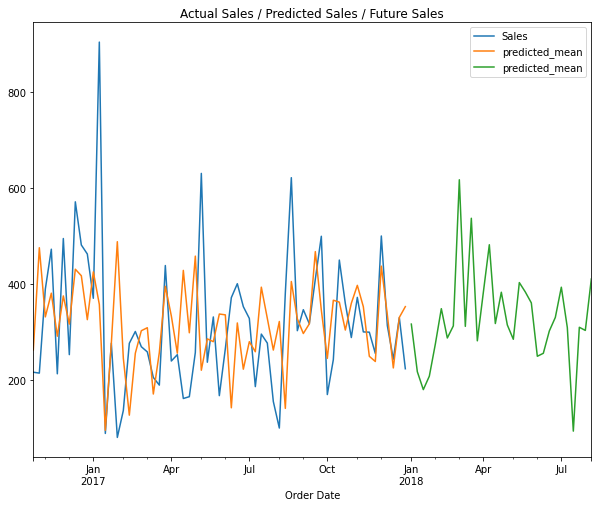

In [209]:
test.plot(figsize=(10,8),legend='actual')
test4.plot(legend='Predicted Sales')
fcast3.plot(legend={'Future'})
plt.title('Actual Sales / Predicted Sales / Future Sales')
#plt.legend('Actual,Predicted,Future values')

Text(0.5, 1.0, 'Actual Sales / Predicted Sales / Future Sales')

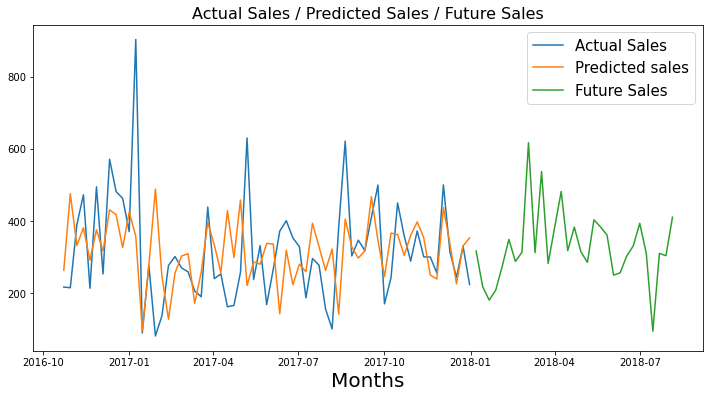

In [212]:
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(test, label='Actual Sales')
ax.plot(test4, label='Predicted sales')
ax.plot(fcast3, label='Future Sales')
plt.xlabel('Months',fontsize=20)
leg = ax.legend(fontsize=15)
plt.title('Actual Sales / Predicted Sales / Future Sales',fontsize=16)

In [160]:
#names=[];aic=[];bic=[]
#names=[Sarima,Sarimax]
final=pd.DataFrame()
final['Algorithm']=['Sarima','Sarimax']
final['AIC']=[aic2,aic3]
final['BIC']=[bic2,bic3]
final.set_index('Algorithm',inplace=True)

In [166]:
final

,AIC,BIC
Algorithm,,
Sarima,1941.745,1941.745
Sarimax,1902.079,1902.079


# Conclusion: Sarimax model which have low AIC & low BIC value it has  predict the best values for the sales and it has done best future forecast.